# Introduction to Machine Learning

## Definition of Machine Learning
*Field of study that gives computers the ability to learn without being explicitly programmed. Arthur Samuel (1959)*

# Machine Learning algorithms

## Supervised learning
For every given input we know how correct output should look like.
### Examples
* Given data about the size of houses on the real estate market, try to predict their price.
* Given an email content, we would like to classify it either as spam or not spam

## Unsupervised learning
For set of inputs we're trying to find the structure or relationships between different inputs.
### Example
* Take a collection of 1,000,000 different genes, and find a way to automatically group these genes into groups that are somehow similar or related by different variables, such as lifespan, location, roles, and so on.

# Supervised learning example

## House pricing prediction

In [ ]:
Pkg.add("PyPlot")
Pkg.add("Interact")
Pkg.add("Reactive")

In [ ]:
include("helper.jl")
m = 10
X, y = gen_samples(m)

[X y]

In [ ]:
plot_samples(X, y)

# Hypothesis

## Single variable
\begin{equation*}
h_{\theta}(x) = \theta_0 + \theta_1 x
\end{equation*}

## Multiple variables
\begin{equation*}
h_{\theta}(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
\end{equation*}

## Multiple variables - vector notation
\begin{equation*}
h_{\theta}(x) = x \cdot \Theta
\end{equation*}

\begin{equation*}
x = \left[1\ x_1\ x_2\ \cdots\ x_n \right],
\Theta = \begin{bmatrix}
       \theta_0 \\
       \theta_1 \\
       \theta_2 \\
       \vdots \\
       \theta_n
\end{bmatrix}
\end{equation*}

# Cost function

Choose $\theta_0$, $\theta_1$ so that $h_{\theta}(x)$ is close to $y$ for our training examples $(x,y)$

\begin{equation*}
J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=1}^{m}\left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2
\end{equation*}

$x^{(i)}$ and $y^{(i)}$ denotes the i-th example in training set

In [ ]:
_X=[ones(m, 1) X]

J(Θ) = 1/2m * sum(((_X * Θ) - y).^2)

plot_cost(J)

# Cost optimization (*add derivatives here)

## Gradient descent algorithm
`repeat for every` $j=0,\dots,n$

\begin{equation*}
\theta_j:=\theta_j - \alpha \frac{\partial}{\partial \theta_j}J\left(\theta_0,\dots,\theta_n\right)
\end{equation*}

`end repeat`

$\alpha$ denotes the learning rate

In [ ]:
α = 10.0^-4
Θ = [0.0, 0.0]

G(Θ) = 1/m * _X' * (_X * Θ - y)

for i=1:10^6
    Θ = Θ - α * G(Θ)
end

Θ

# Improving the algorithm

In [ ]:
Pkg.add("Optim")

In [ ]:
using Optim

init_Θ=[0.0, 0.0]

G!(res, Θ) = res[:] = G(Θ)

optimize(J, G!, init_Θ, GradientDescent())

# Classification problems

## Why linear regression is not suitable for classification problems?

In [ ]:
X = [1, 2, 3, 4, 5, 6, 7, 8]
y = [0, 0, 0, 0, 1, 1, 1, 1]
plot(X, y, "rx")
plot(X, 1/6 * (X - 1.5))

In [ ]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 14]
y = [0, 0, 0, 0, 1, 1, 1, 1, 1]
plot(X, y, "rx")
plot(X, 1/10*(X-2))

## Output of logistic regression
\begin{equation*}
h_{\theta}(x) = s(\Theta^Tx)\\
s(z)=\frac{1}{1+e^{-z}}
\end{equation*}

In [ ]:
sig(z) = 1.0 ./ (1.0 + exp(-z))


sig([-10, -1, 0, 1, 10])

In [ ]:
z = linspace(-5,5,100)
plot(z, sig(z))

# Installing required dependencies

In [ ]:
Pkg.add("MNIST")
Pkg.add("Images")
Pkg.add("ImageMagick")

# Importing the data

In [ ]:
using MNIST

X, y = traindata()

# Inspecting the data

In [ ]:
size(X), size(y)

In [ ]:
(minimum(X), maximum(X))

## Normalizing the data

In [ ]:
X = X'
X /= 255.0

all(x -> 0.0 <= x <= 1.0, X), size(X)

## Displaying individual images

In [ ]:
m, n = size(X)
sqr_n = Int64(√n)

s = slider(1:m)

In [ ]:
using Images

map(i -> colorview(Gray, reshape(X[i, :], sqr_n, sqr_n)), signal(s))

In [ ]:
map(i -> y[i], signal(s))

## Training the model

Training is done only on 100 out of 30000 examples available in the MNIST dataset. To increase size of the training dataset modify the `_m` variable - note that the training time will increase as well.

In [55]:
using Optim

_m = 100
_X = [ones(_m, 1) X[1:_m, :]]
init_Θ = zeros(n+1)
λ = 0.1
all_Θ = zeros(10, n+1)

for i = 1:10
    println("iteration $i")
    
    tic()
    _y = y[1:_m] .== i % 10
    
    local J(Θ) = (-_y' * log(sig(_X * Θ)) - (1.0 - _y') * log(1 - sig(_X * Θ)))[1] + λ/2_m * sum(Θ[2:end] .^ 2)
    local G(Θ) = 1/_m * _X' * (sig(_X * Θ) - _y) + unshift!(λ/_m * Θ[2:end], 0.0)
    local G!(res, Θ) = res[:] = G(Θ)

    res = optimize(J, G!, init_Θ, GradientDescent())
    all_Θ[i,:] = res.minimizer
    toc()
end

iteration 1
elapsed time: 26.871019179 seconds
iteration 2
elapsed time: 6.79851368 seconds
iteration 3
elapsed time: 8.791611448 seconds
iteration 4
elapsed time: 2.900804367 seconds
iteration 5
elapsed time: 8.703449338 seconds
iteration 6
elapsed time: 7.096026743 seconds
iteration 7
elapsed time: 4.101550276 seconds
iteration 8
elapsed time: 9.297409927 seconds
iteration 9
elapsed time: 19.596238358 seconds
iteration 10
elapsed time: 5.897287207 seconds


# Training results

Move the slider to check how the trained model predicts the number in the image.

In [56]:
s2 = slider(1:m)

Interact.Slider{Int64}(49: "input-11" = 30000 Int64 , "", 30000, 1:60000, "horizontal", true, "d", true)

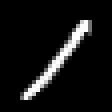

In [57]:
map(i -> colorview(Gray, reshape(X[i, :], sqr_n, sqr_n)), signal(s2))

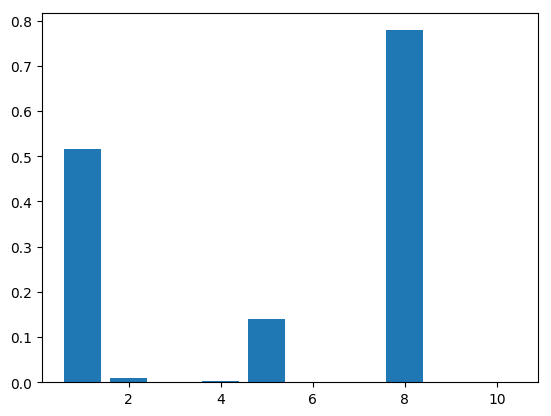

In [58]:
using PyPlot

f = figure()

map(i -> withfig(f) do; bar(1:10,reshape(sig([1 X[i,:]'] * all_Θ'), 10)); end, signal(s2))